In [5]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import librosa

In [2]:
#import sys and pathlib for adding project root to path
import sys
from pathlib import Path

In [3]:
#this is from our module data_augmentation.py
from data_augmentation import frequency_masking, convert_to_spectrogram, load_to_float32, normalize_audio, fade_in_out

In [4]:
project_root = Path().resolve().parents[2]
print(f"Project root: {project_root}")
project_root

Project root: /home/edgar/code/Arkyed/08-Project/databass-code/DataBass


PosixPath('/home/edgar/code/Arkyed/08-Project/databass-code/DataBass')

0.36584473


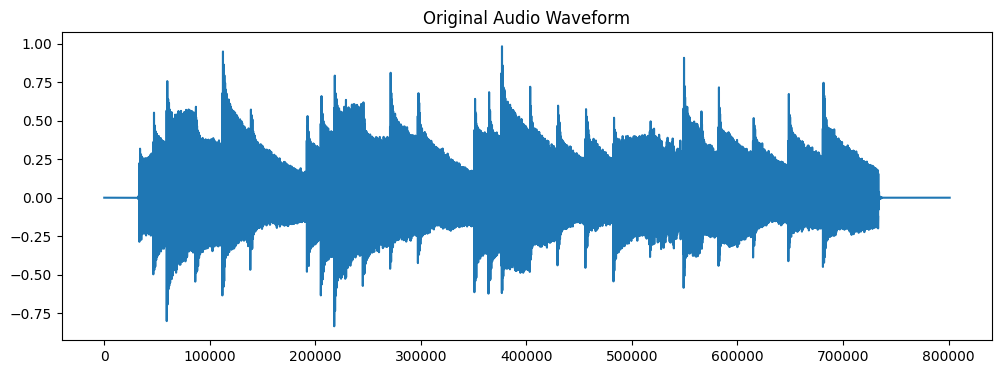

In [8]:
file_path = os.path.join(project_root, 'notebooks', 'Edgar', 'HappyBDay.wav')

y , sr = librosa.load(file_path, sr=None)
plt.figure(figsize=(12, 4))
plt.plot(y)
plt.title('Original Audio Waveform')
print(y[50000])

Text(0.5, 1.0, 'Normalized Audio Waveform')

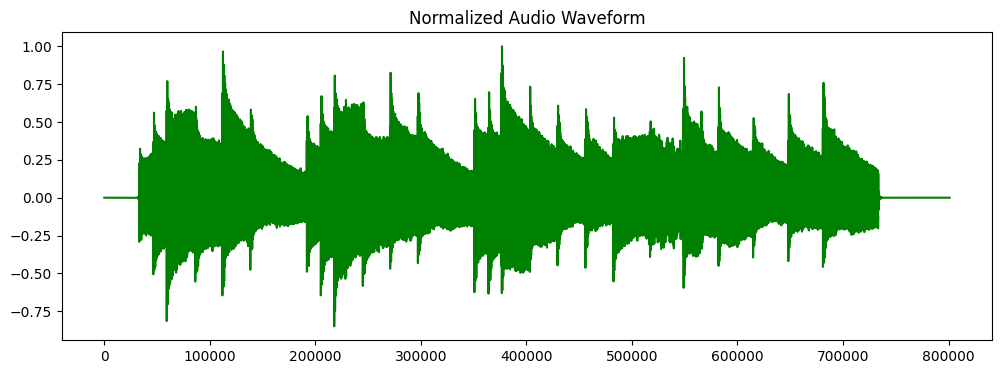

In [9]:
#let's normalize the audio

max_val = np.max(np.abs(y))
if max_val == 0:
    pass
normalized_audio = y / max_val

plt.figure(figsize=(12, 4))
plt.plot(normalized_audio,c='green')
plt.title('Normalized Audio Waveform')

Text(0.5, 1.0, 'Noisy Audio Waveform')

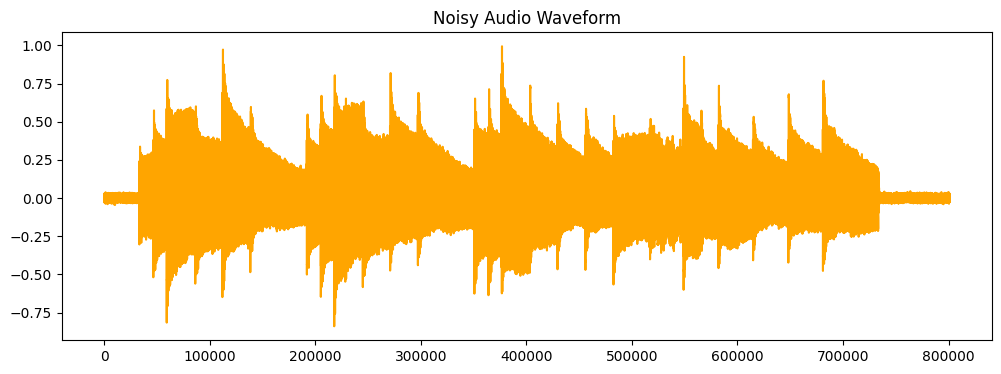

In [10]:
#let's try adding noise augmentation
noise_factor = 0.01
noisy_audio = y + noise_factor * np.random.normal(size=y.shape)

plt.figure(figsize=(12, 4))
plt.plot(noisy_audio,c='orange')
plt.title('Noisy Audio Waveform')

Text(0, 0.5, 'Amplitude')

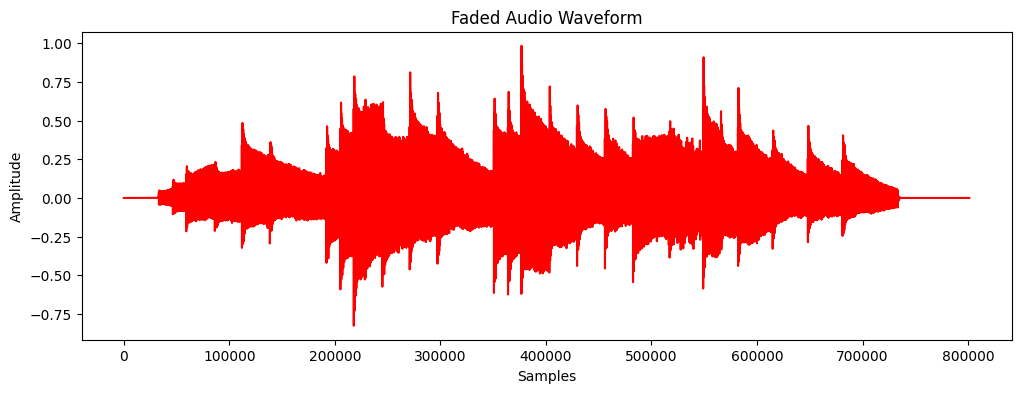

In [ ]:
#let's try the fade in and fade out augmentation

fade_duration = 1 # in sec

num_fade_samples = int(fade_duration * sr)
max_fade = (len(y) // 2) if y.ndim == 1 else (y.shape[0] // 2)
num_fade_samples = max(1, min(num_fade_samples, max_fade))

# create fade in/out ramps (1D)
fade_in_ramp = np.linspace(0.0, 1.0, num_fade_samples, dtype=y.dtype)
fade_out_ramp = np.linspace(1.0, 0.0, num_fade_samples, dtype=y.dtype)

# apply fades depending on mono (1D) vs stereo/multi-channel (2D)
if y.ndim == 1:
    faded = y.copy()
    faded[:num_fade_samples] = faded[:num_fade_samples] * fade_in_ramp
    faded[-num_fade_samples:] = faded[-num_fade_samples:] * fade_out_ramp
else:
    faded = y.copy()
    faded[:num_fade_samples, :] = faded[:num_fade_samples, :] * fade_in_ramp[:, None]
    faded[-num_fade_samples:, :] = faded[-num_fade_samples:, :] * fade_out_ramp[:, None]

plt.figure(figsize=(12, 4))
plt.plot(faded,c='red')
plt.title('Faded Audio Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

/home/edgar/.pyenv/versions/DataBass/lib/python3.12/site-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


TypeError: Invalid shape (1, 256, 256) for image data

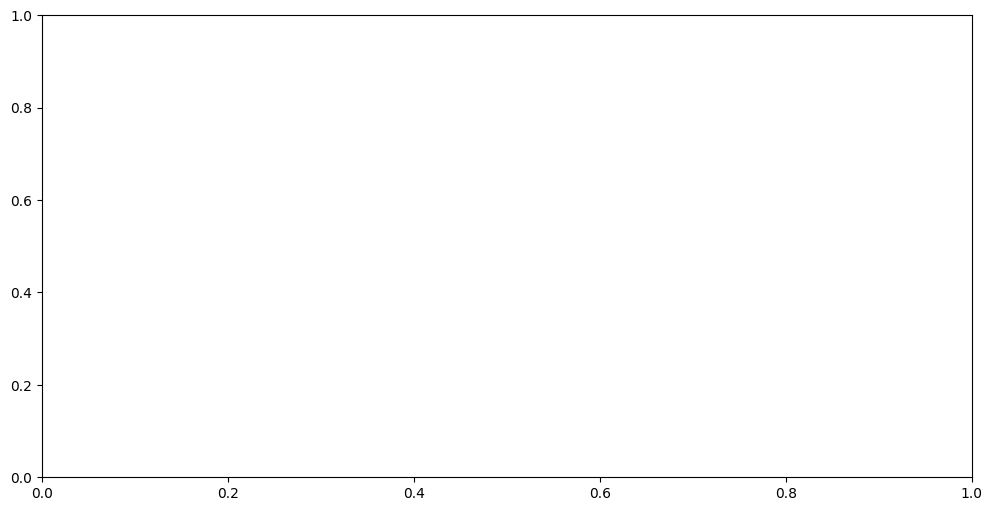

In [17]:
#let's use some spectrogram augmentation
spectrogram = convert_to_spectrogram(y, sr)
plt.figure(figsize=(12, 6))
plt.imshow(spectrogram.T, aspect='auto', origin='lower', cmap='viridis')
plt.title('Spectrogram')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')